In [1]:
import pandas as pd
import numpy as np 
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import requests
import json
from urlparse import urlparse
from itertools import islice

In [2]:
stockAnalysisRequest = requests.get("https://www.blackrock.com/tools/hackathon/performance?" \
             + "betaPortfolios=SNP500&identifiers=GOOG&riskFreeRatePortfolio=LTBILL1-3M").json()
# with open('stockAnalysisRequest.json', 'w') as outfile: 
#     json.dump(stockAnalysisRequest, outfile)

In [3]:
Y = [y[1] for y in islice(stockAnalysisRequest['resultMap']['RETURNS'][0]['performanceChart'], 0, None, 1)]
X = list(range(len(Y)))

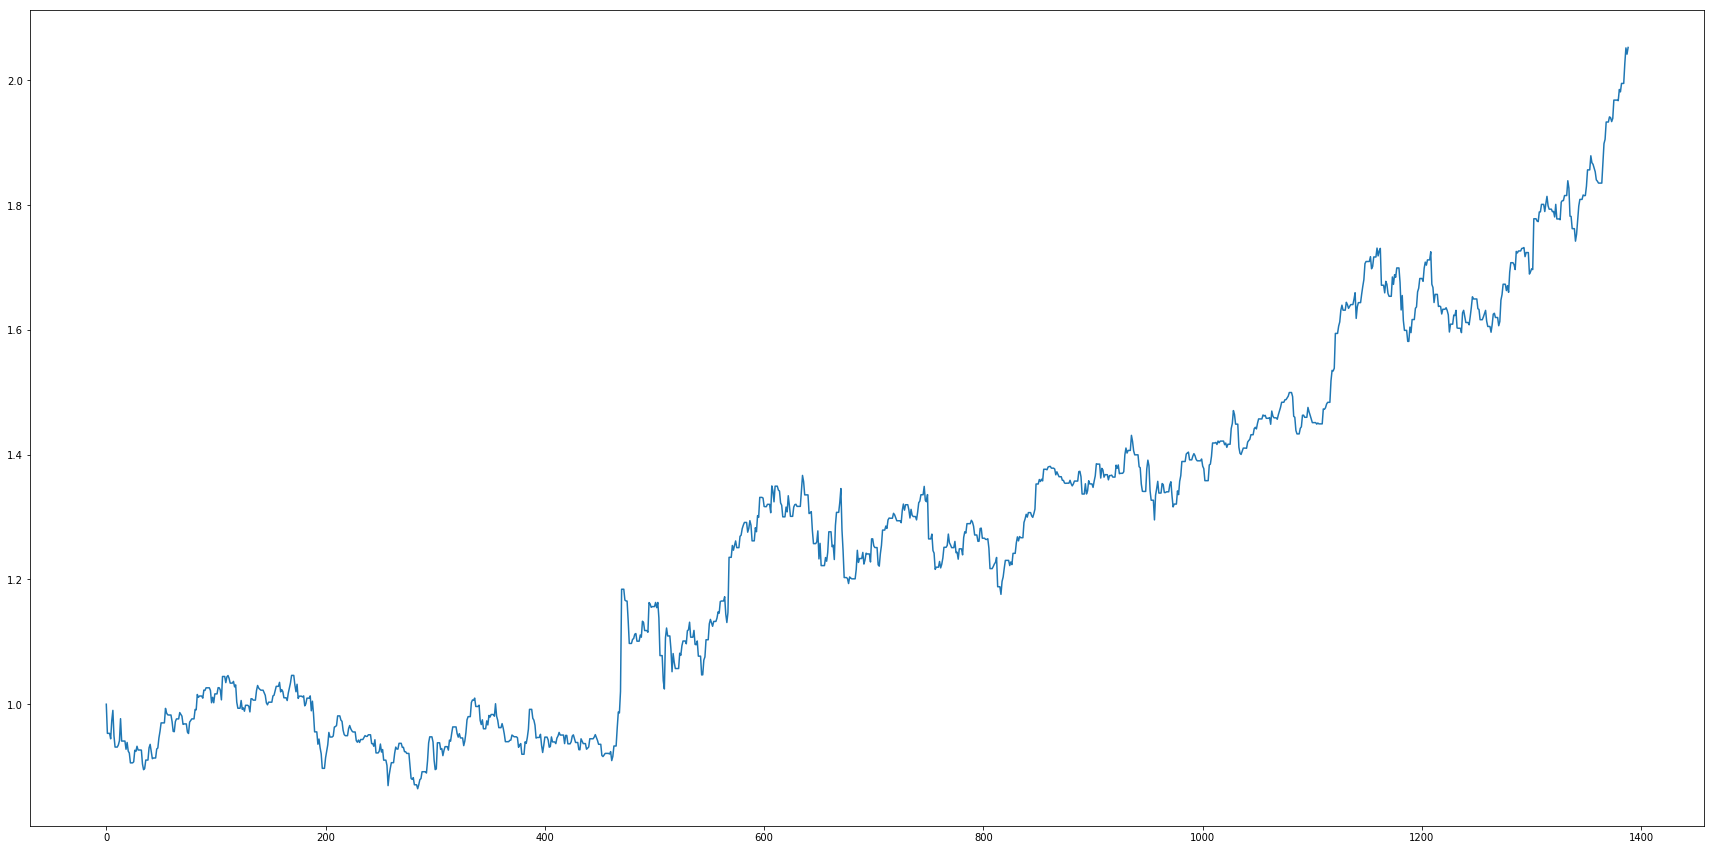

In [4]:
plt.figure(figsize=(30,15))
plt.plot(X,Y)
plt.show()

In [5]:
stockAnalysis2017Request = requests.get("https://www.blackrock.com/tools/hackathon/performance?" \
             + "betaPortfolios=SNP500&endDate=20171231&identifiers=GOOG&riskFreeRatePortfolio=LTBILL1-3M&startDate=20170101").json()
# with open('stockAnalysisRequest.json', 'w') as outfile: 
#     json.dump(stockAnalysis2017Request, outfile)

In [6]:
investment = 1000 
Y = [investment*y[1] for y in islice(stockAnalysis2017Request['resultMap']['RETURNS'][0]['performanceChart'], 0, None, 1)]
X = list(range(len(Y)))

In [32]:
sorted([str(i) for i in stockAnalysis2017Request['resultMap']['RETURNS'][0]['returnsMap'].keys()])

['20170101',
 '20170102',
 '20170103',
 '20170104',
 '20170105',
 '20170106',
 '20170107',
 '20170108',
 '20170109',
 '20170110',
 '20170111',
 '20170112',
 '20170113',
 '20170114',
 '20170115',
 '20170116',
 '20170117',
 '20170118',
 '20170119',
 '20170120',
 '20170121',
 '20170122',
 '20170123',
 '20170124',
 '20170125',
 '20170126',
 '20170127',
 '20170128',
 '20170129',
 '20170130',
 '20170131',
 '20170201',
 '20170202',
 '20170203',
 '20170204',
 '20170205',
 '20170206',
 '20170207',
 '20170208',
 '20170209',
 '20170210',
 '20170211',
 '20170212',
 '20170213',
 '20170214',
 '20170215',
 '20170216',
 '20170217',
 '20170218',
 '20170219',
 '20170220',
 '20170221',
 '20170222',
 '20170223',
 '20170224',
 '20170225',
 '20170226',
 '20170227',
 '20170228',
 '20170301',
 '20170302',
 '20170303',
 '20170304',
 '20170305',
 '20170306',
 '20170307',
 '20170308',
 '20170309',
 '20170310',
 '20170311',
 '20170312',
 '20170313',
 '20170314',
 '20170315',
 '20170316',
 '20170317',
 '20170318',

In [33]:
fig, ax = plt.subplots(figsize=(30,15))
plt.xlim(0,len(X))
plt.ylabel('Investment Value', fontsize=26)
plt.yticks(size=26)
plt.xticks(sorted([str(i) for i in stockAnalysis2017Request['resultMap']['RETURNS'][0]['returnsMap'].keys()]), size=26, rotation=45)
ax.plot(X, Y, c='red', label='Performance', linewidth=4)
plt.suptitle('GOOG performance 2017',fontsize=40)
ax.axhline(Y[-1], label='Investment value= ${:.2f}'.format(Y[-1]), linewidth=4, c='green')
ax.legend(prop={'size': 26})
plt.show()

AttributeError: 'NoneType' object has no attribute 'seq'

In [8]:
stocks = ['GOOG','AAPL','']
portfolioAnalysisRequest = requests.get("https://www.blackrock.com/tools/hackathon/performance?" \
             + "betaPortfolios=SNP500&endDate=20171231&identifiers=GOOG,AAPL,MSFT"\
             + "&riskFreeRatePortfolio=LTBILL1-3M&startDate=20170101").json()
# with open('portfolioAnalysisRequest.json', 'w') as outfile: 
#     json.dump(portfolioAnalysisRequest, outfile)

In [9]:
investment = 1000
results = portfolioAnalysisRequest['resultMap']['RETURNS']
Y = [0]*len(results[0]['performanceChart'])
for i in range(len(results[0]['performanceChart'])):
    Y[i] = investment*((results[0]['performanceChart'][i][1]
                        +results[1]['performanceChart'][i][1]
                        +results[2]['performanceChart'][i][1])/len(results))
X = list(range(len(Y)))

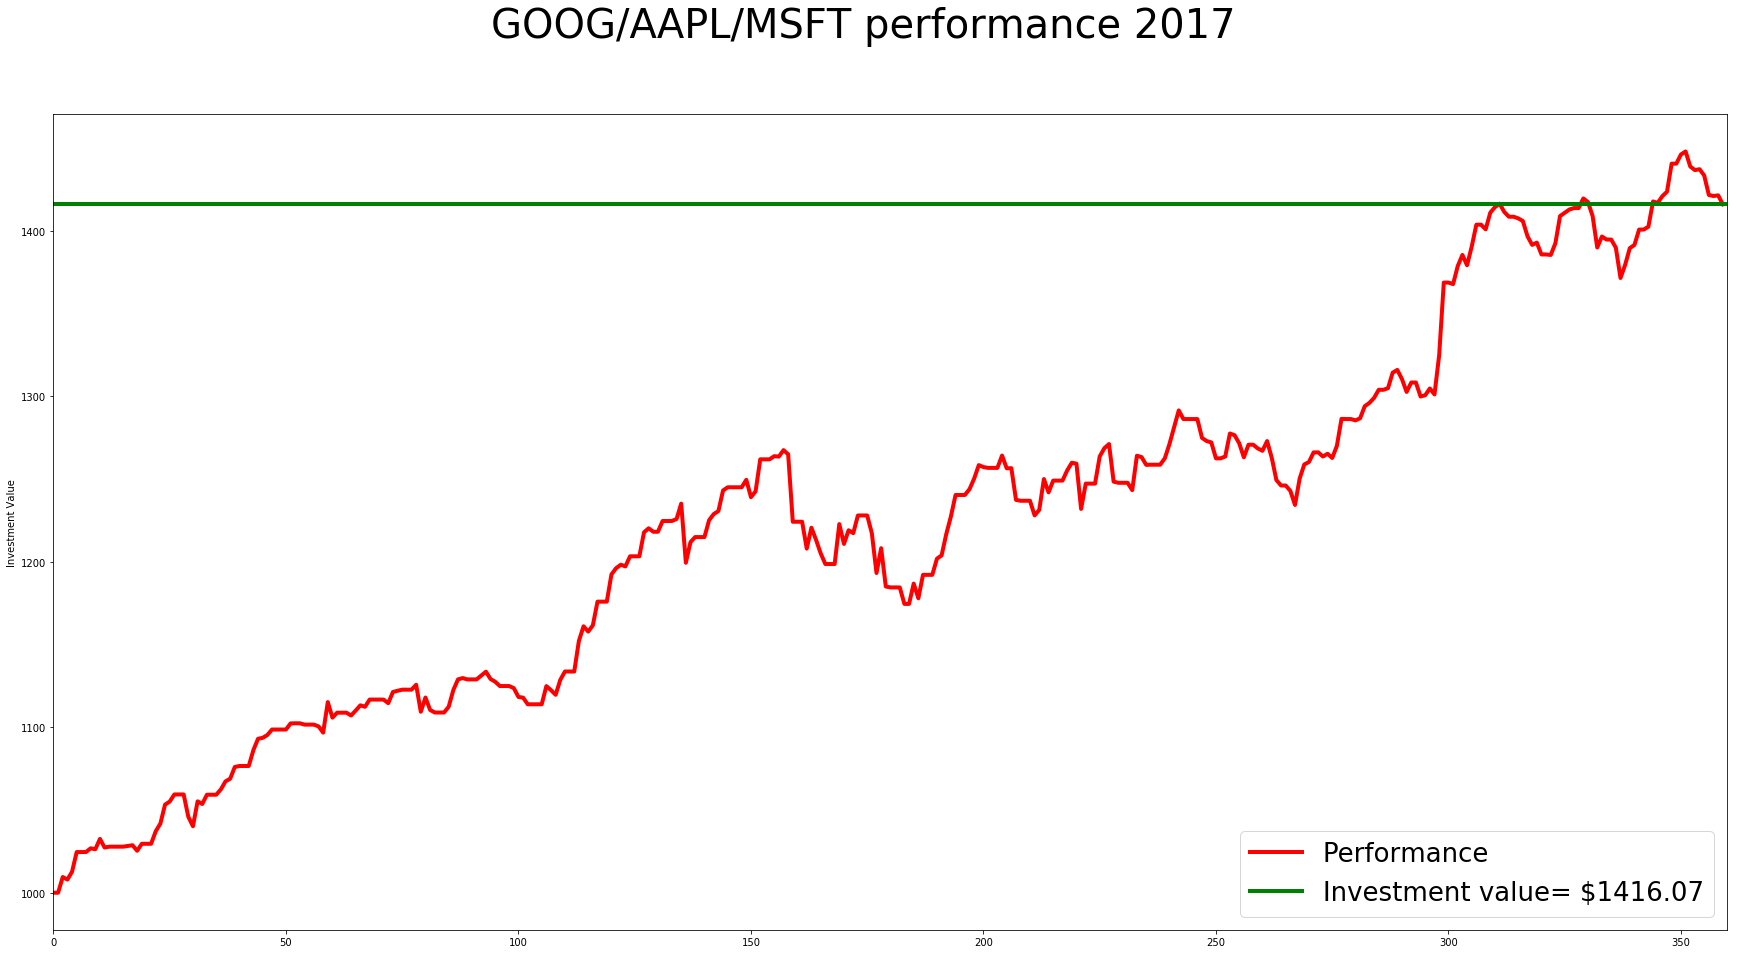

In [10]:
fig, ax = plt.subplots(figsize=(30,15))
plt.xlim(0,len(X))
ax.plot(X, Y, c='red', label='Performance', linewidth=4)
plt.suptitle('GOOG/AAPL/MSFT performance 2017',fontsize=40)
ax.axhline(Y[-1], label='Investment value= ${:.2f}'.format(Y[-1]), linewidth=4, c='green')
plt.ylabel('Investment Value')
ax.legend(prop={'size': 26})
plt.show()